# What Is Bayesian Updating?

https://en.wikipedia.org/wiki/Bayesian_inference

Bayesian updating is a statistical technique used across various fields to refine predictions or beliefs with new information. By starting with initial assumptions (priors) and incorporating fresh data (likelihood), this method systematically updates our understanding, producing more accurate and informed beliefs (posteriors). It's a dynamic process, where each update enhances the precision of future predictions or decisions.

In practice, Bayesian updating is crucial for tasks like weather forecasting, medical diagnostics, financial analysis, machine learning, product testing, and policy making. Whether adjusting weather predictions with the latest satellite data, refining disease diagnoses with new test results, optimizing investment portfolios with current market trends, or evolving public health policies during a pandemic, Bayesian updating helps professionals make better decisions by leveraging the power of continuous learning from new evidence.

# Estimating website conversion rates using Bayesian updating

Estimating website conversion rates using Bayesian updating is a powerful approach that allows for continuous refinement of estimates as new data becomes available. We'll simulate a scenario where daily visitor and conversion data is used to update our beliefs about a website's conversion rate. This method provides a more nuanced understanding of the conversion rate, accounting for uncertainty and variability over time.

In [ ]:
# Libraries and Setup
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta as beta_dist # for plotting purposes

### Initial Beliefs
In Bayesian analysis, we start with a prior distribution that represents our initial beliefs before observing any data. Here, we're using a Beta distribution to model our prior belief about the conversion rate. These parameters reflect a conservative initial belief, suggesting a low conversion rate. The choice of prior should be based on historical data, expert judgment, or could be intentionally vague to let the data speak more strongly.

In [ ]:
# Initial prior
alpha_prior = 2
beta_prior = 18

### Simulating Daily Visitors and Conversions

In [ ]:
# Simulated daily visitors and conversions (can be increased for example purposes)
daily_visitors = [100, 120, 150, 80, 200, 110, 130, 160, 90, 210]
daily_conversions = [10, 18, 20, 5, 50, 12, 20, 24, 7, 55]

### Sequential Bayesian Updating

For each day, we update our belief (posterior) based on the observed data (likelihood) and the prior. The posterior becomes the new prior for the next day's update.

In [ ]:
# Store posteriors
posteriors = []

# Sequentially update beliefs
for visitors, conversions in zip(daily_visitors, daily_conversions):
    # Update posterior
    alpha_posterior = alpha_prior + conversions
    beta_posterior = beta_prior + visitors - conversions

    # Append to list
    posteriors.append((alpha_posterior, beta_posterior))

    # Next day's prior is today's posterior
    alpha_prior = alpha_posterior
    beta_prior = beta_posterior

### Plotting the Results
Finally, we visualize how our belief about the conversion rate evolves over time as we incorporate more data.

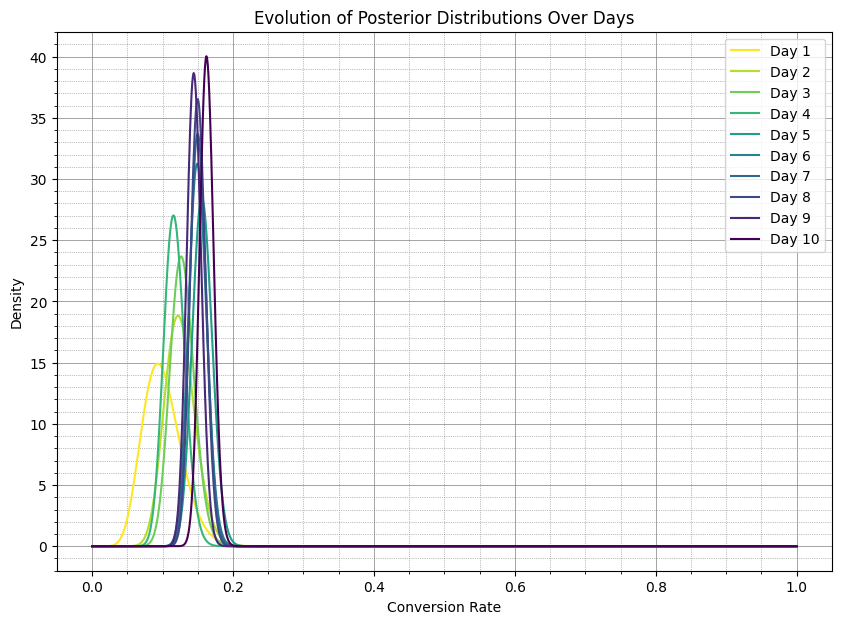

In [ ]:
# Plotting
x = np.linspace(0, 1, 1000)
plt.figure(figsize=(10, 7))

colors = plt.cm.viridis(np.linspace(1, 0, len(posteriors)))
for i, (alpha, beta) in enumerate(posteriors):
    plt.plot(x, beta_dist.pdf(x, alpha, beta), label=f'Day {i+1}', color=colors[i])

plt.title('Evolution of Posterior Distributions Over Days')
plt.xlabel('Conversion Rate')
plt.ylabel('Density')
plt.legend()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
plt.minorticks_on()
plt.show()

### Reading the Plot

The x-axis represents possible conversion rates, ranging from 0 to 1 (0% to 100%). Each point on this axis is a potential conversion rate value for the website.The y-axis shows the density of the probability distribution for each conversion rate value. Higher values indicate a higher probability (belief) that the conversion rate is close to the corresponding x-value.

Each curve represents the posterior distribution of the conversion rate after updating our beliefs with data from a specific day.

### Interpreting the Evolution
1. The width of each curve indicates the uncertainty or variance in our belief about the conversion rate. Wider curves suggest greater uncertainty, while narrower curves indicate more confidence in our estimate. As we gather more data over time, we typically see these curves become narrower, reflecting increased certainty about the conversion rate.

2. The location of the peak (the mode of the distribution) for each curve represents the most probable conversion rate given the data up to that day. Observing how the peak moves from one day to the next can indicate trends in the conversion rate over time.

3. The sequence of curves shows how our belief about the conversion rate evolves. Initially, our belief may be quite uncertain and broad, but as more data is collected, the posterior distributions become more peaked and narrow, indicating a more precise estimate of the conversion rate.

###What We Observe and What It Means
Increasing Precision: The curves become progressively narrower, it means we are becoming more confident in our estimate of the conversion rate. This is expected as more data allows us to update our beliefs with greater accuracy.

Shifting Peaks: The peak of the distributions shifts over time, it suggests that our understanding of the conversion rate is changing with the influx of new data. For example, if the peaks move to the right, it suggests an increasing trend in the conversion rate.

Stabilization: We see that over time, the curves start to look similar and stabilize around a particular range of values, it means that additional data is not significantly changing our belief about the conversion rate. We have reached a point where our estimate of the conversion rate is relatively precise and consistent with the observed data.

# A/B Testing


A/B testing is a way to find out which of two options is better by comparing them. It's used in many areas, like improving websites, emails, or ads, to see which one works best for goals like getting more clicks or sales. The key to a good test is to clearly pick what to measure, make sure the test is fair, and run it long enough to be sure about the results. This helps make smart choices based on actual data.

Suppose we are conducting an A/B test to compare the conversion rates of two different website designs, labeled Design A and Design B. A/B testing is a popular method for evaluating changes to web pages, marketing strategies, or any other variable that might affect user behavior. By randomly assigning visitors to either version A or B, we can observe which design performs better in terms of conversion rate, where "conversion" might mean making a purchase, signing up for a newsletter, or any other desired action.

The goal is to use Bayesian methods to update our beliefs about the conversion rates of both designs as new data comes in each day. This approach not only allows us to estimate the conversion rates more accurately but also to understand the uncertainty around these estimates.

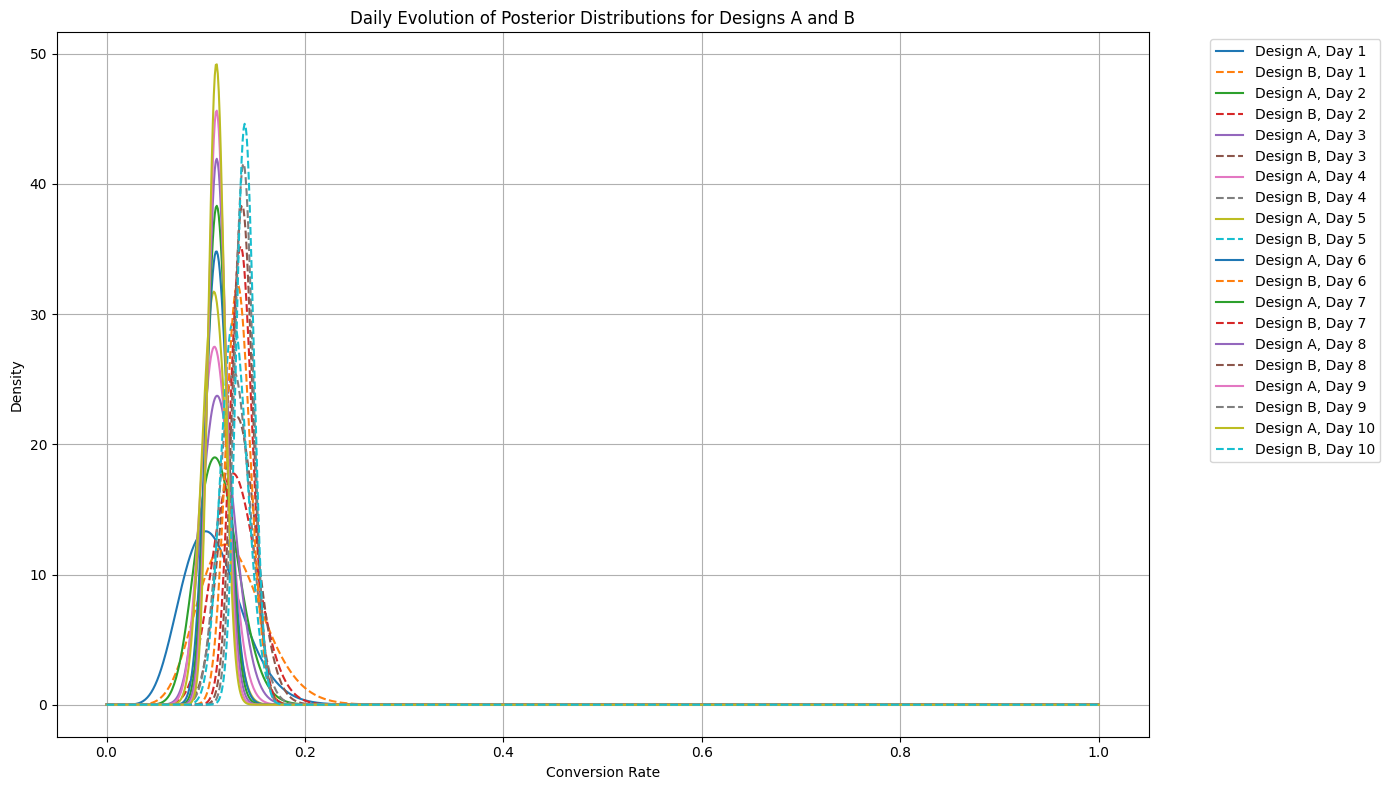

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta as beta_dist

# Initialize prior beliefs
alpha_A, beta_A = 1, 1  # Prior for design A
alpha_B, beta_B = 1, 1  # Prior for design B

# Simulated daily visitors and conversions over 10 days
daily_visitors_A = [100, 120, 130, 110, 150, 140, 160, 180, 200, 210]
daily_conversions_A = [10, 14, 15, 11, 16, 17, 18, 20, 22, 23]

daily_visitors_B = [100, 120, 130, 110, 150, 140, 160, 180, 200, 210]
daily_conversions_B = [12, 16, 18, 13, 19, 21, 24, 26, 29, 31]

# Setup plot
plt.figure(figsize=(14, 8))

x = np.linspace(0, 1, 1000)
for day in range(len(daily_visitors_A)):
    # Update beliefs with data from the day
    alpha_A += daily_conversions_A[day]
    beta_A += daily_visitors_A[day] - daily_conversions_A[day]
    alpha_B += daily_conversions_B[day]
    beta_B += daily_visitors_B[day] - daily_conversions_B[day]

    # Plot posterior distributions for the day
    plt.plot(x, beta_dist.pdf(x, alpha_A, beta_A), label=f'Design A, Day {day + 1}')
    plt.plot(x, beta_dist.pdf(x, alpha_B, beta_B), linestyle='--', label=f'Design B, Day {day + 1}')

# Enhance plot
plt.title('Daily Evolution of Posterior Distributions for Designs A and B')
plt.xlabel('Conversion Rate')
plt.ylabel('Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid()
plt.show()


### Interpreting the Results
1. Narrowing of Distributions: The curves become narrower over time, it indicates increased certainty about the conversion rate estimate. This is expected as accumulating more data reduces uncertainty.

2. Shifts in the position of the peak of these distributions indicate changes in the estimated most likely conversion rate based on the accumulated data.

3. Comparison Between Designs: By comparing the distributions of Design A and Design B, we can observe which design tends to have higher conversion rates. For instance, Design B's curves are consistently to the right of Design A's, it suggests that Design B has a higher conversion rate.

4. Uncertainty and Overlap: Overlapping distributions between designs, especially in the early days, highlight uncertainty and the need for more data to distinguish between the designs. As the test progresses, design B consistently shows higher conversion rates with less overlap, and therefore it can be considered as the better performing design.

Overall, as days progress, we observe the posterior distributions becoming narrower, indicating increased confidence in the conversion rate estimates. This is because more data provides more evidence, reducing uncertainty.

Comparing the distributions of Designs A and B across days allows us to see how our belief regarding which design is superior evolves over time. If one design consistently shows higher conversion rates with increasing confidence (narrower distributions), it suggests that design is more effective.

The Bayesian approach to A/B testing provides a robust framework for understanding not just which design performs better but also how confident we can be in that assessment.







# Bayesian Updating with Monthly Stock Returns

In this section, we'll explore how to use Bayesian updating to refine our estimates of a stock's average monthly return. We'll focus on Apple Inc. (AAPL) as our example, but this method can be applied to any stock.

### Why Use Bayesian Updating for Stock Returns?
The stock market is inherently uncertain and unpredictable. Bayesian updating offers a systematic way to incorporate new data (e.g., monthly stock returns) into our predictions, allowing us to adjust our expectations in light of new information.

### Assumption About Returns: Normal Distribution
We're assuming that the stock returns follow a normal distribution. This assumption means we believe the returns are symmetrically distributed around a mean value, with the majority of the returns falling within a certain distance (measured by the standard deviation) from this mean. The normal distribution is chosen for its mathematical properties and the Central Limit Theorem, which suggests that averages of large samples of independent, identically distributed variables tend toward a normal distribution, even if the original variables themselves are not normally distributed.


In [ ]:
# Setting up the environment
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch real stock data for approximately the last 30 months with monthly data

# Assign the ticker symbol for Apple Inc. to a variable for easy reference
ticker = "AAPL"

# Download 10 years of monthly Apple Inc. stock data using the Yahoo Finance API
# 'period' specifies the duration of the data (10 years), and 'interval' sets the data frequency (1 month)
data = yf.download(ticker, period="10y", interval="1mo")

# Calculate the monthly returns based on the adjusted close prices
# 'pct_change()' computes the percentage change between the current and prior elements, giving monthly returns
# 'dropna()' removes any missing values that result from the percentage change calculation
data['Monthly Return'] = data['Adj Close'].pct_change().dropna()

# Extract the monthly returns as a NumPy array, excluding the first element because it's NaN due to 'pct_change()'
# The first month's return is not calculable as there's no previous month's data to compare
real_monthly_returns = data['Monthly Return'].values[1:]

[*********************100%%**********************]  1 of 1 completed


### Initial Beliefs

Before we see any data, we start with an initial guess (or "prior") about the stock's average monthly return. Let's say our initial guess is a 0.1% average monthly return with a standard deviation (a measure of uncertainty) of 2%.

In [ ]:
# Initial prior beliefs about the mean monthly return
mean_prior = 0.001  # Initial guess for the mean monthly return
variance_prior = 0.02 ** 2  # Variance of the prior


 The observation variance represents our assumption about the variability (or uncertainty) in the new data we observe each month, which in this case is the monthly returns of a stock.

 By using the historical variance of the monthly returns, we are making an assumption that the future variability of these returns will be similar to what we have observed in the past.

  In a more complex model, you might consider dynamic models of observation variance, where the variance itself could change over time or be influenced by other factors. However, for the sake of simplicity and focus on the core concept of Bayesian updating, using a fixed observation variance based on historical data simplifies the model without introducing unnecessary complexity. This allows for a clearer demonstration of how Bayesian updating works. (Note: The choice of observation variance is a critical assumption in the model. It's essential to consider whether the historical variance is a reasonable estimate for future variability. Factors like changes in the company's fundamentals, economic environment, or market conditions could necessitate adjustments to this assumption.)

In [ ]:
# Known observation variance (assuming fixed for simplification)
observation_variance = np.var(real_monthly_returns)

### Update function

Our update function, update_mean_prior, will take our current beliefs (the "prior"), a new piece of data (the "observation"), and our assumptions about the data's variability to calculate a new estimate (the "posterior").

We're assuming that the stock returns follow a normal (Gaussian) distribution. The mean (μ) of the distribution represents the average return of the stock over a certain period.
The standard deviation (σ) measures the dispersion or variability around the mean, indicating how much the returns can deviate from the average return.

Intuitive Explanation
1. Combining Precisions: Adding the precisions (inverse of variances) of the prior and the observation reflects the idea of accumulating evidence. Each piece of data (observation) adds to the precision of our knowledge about the parameter.
2. Reduced Uncertainty: The resulting posterior variance is a harmonic mean of the prior and observation variances, which guarantees it to be smaller than the smallest of the two. This mathematical property aligns with the intuitive concept that adding new information reduces uncertainty.

In [ ]:
# Function to perform Bayesian updating of the mean
def update_mean_prior(prior_mean, prior_variance, observation, observation_variance):
    posterior_variance = 1 / ((1 / prior_variance) + (1 / observation_variance))
    posterior_mean = posterior_variance * ((prior_mean / prior_variance) + (observation / observation_variance))
    return posterior_mean, posterior_variance

### Updating our beliefs

With each new month's return data, we use our function to update our beliefs. This process refines our estimate of the average monthly return based on all the data we've accumulated.

In [ ]:
# Lists to store the updated means and variances
updated_means = [mean_prior]
updated_variances = [variance_prior]

# Sequentially update beliefs with each new month's return
for month_return in real_monthly_returns:
    mean_prior, variance_prior = update_mean_prior(mean_prior, variance_prior, month_return, observation_variance)
    updated_means.append(mean_prior)
    updated_variances.append(variance_prior)

### Visualizing the Results

Finally, we plot our updated estimates over time, showing how our belief about the average monthly return has evolved.

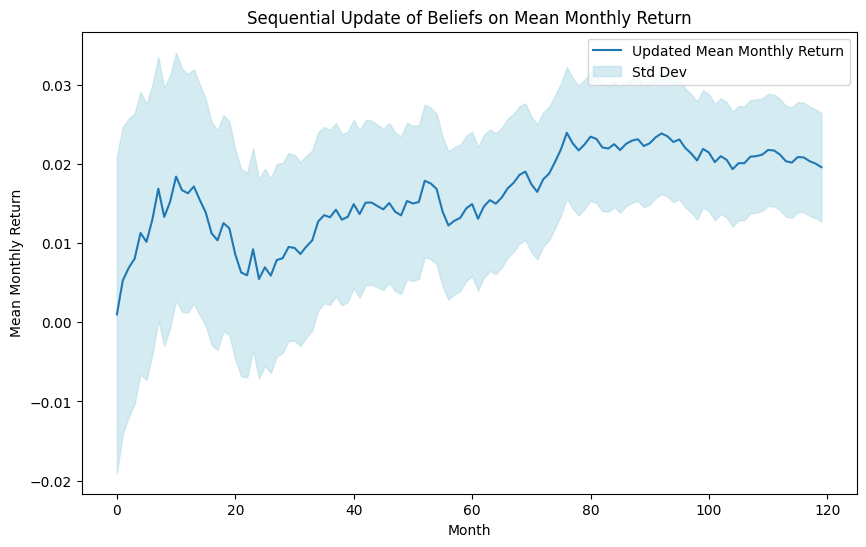

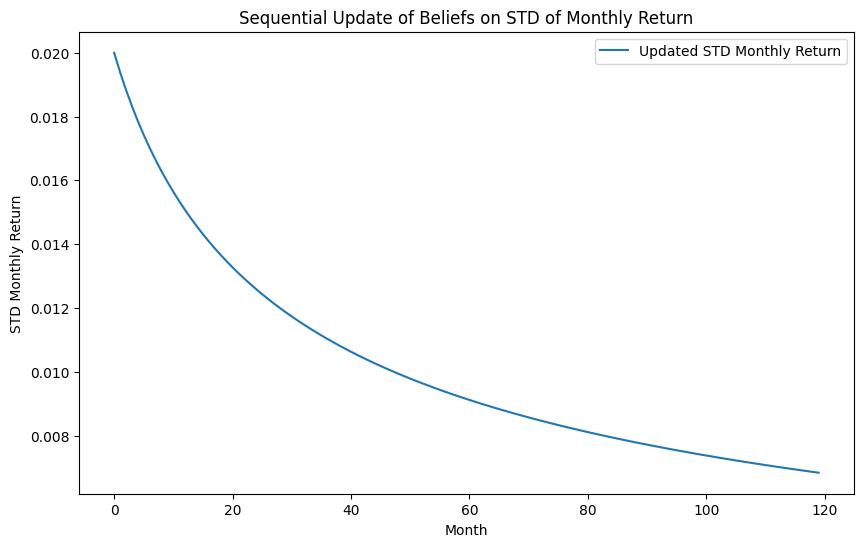

In [ ]:
# Convert variances to standard deviations for plotting
updated_stds = np.sqrt(updated_variances)

# Plotting the updated means over the months, with std deviation as shaded area
plt.figure(figsize=(10, 6))
plt.plot(updated_means, label='Updated Mean Monthly Return')
plt.fill_between(range(len(updated_means)),
                 np.array(updated_means) - np.array(updated_stds),
                 np.array(updated_means) + np.array(updated_stds),
                 color='lightblue', alpha=0.5, label='Std Dev')
plt.xlabel('Month')
plt.ylabel('Mean Monthly Return')
plt.title('Sequential Update of Beliefs on Mean Monthly Return')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(updated_stds, label='Updated STD Monthly Return')
plt.xlabel('Month')
plt.ylabel('STD Monthly Return')
plt.title('Sequential Update of Beliefs on STD of Monthly Return')
plt.legend()
plt.show()


The updated_stds variable represents the standard deviations of the posterior distributions as we sequentially update our beliefs with new observations.Decreasing updated_stds in the context of Bayesian updating signifies a reduction in the uncertainty or variance of our estimates over time.

Each new piece of evidence contributes to refining our knowledge about a parameter (e.g., the mean monthly return of a stock). Decreasing updated_stds means that, with each update, we're becoming less uncertain about the parameter's true value. This is a desired outcome, as it suggests that the accumulating data is effectively informing our estimates.

# Other: Synthetic stock data, and using pymc to update beliefs

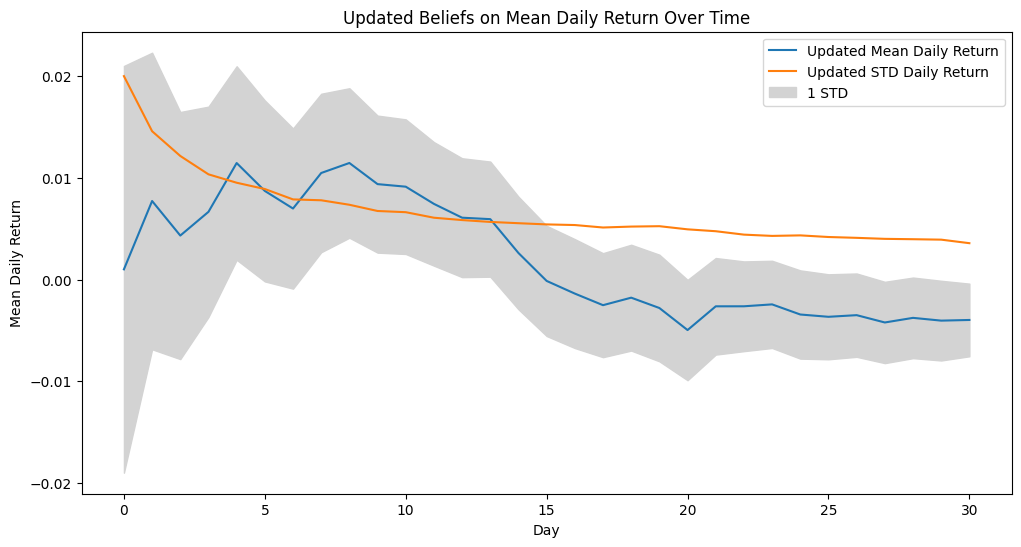

In [ ]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt

# Generate synthetic daily returns data for 30 days (replace this with real data)
np.random.seed(42)
true_mean = 0.001  # True average daily return
daily_returns = np.random.normal(true_mean, 0.02, 30)  # Synthetic daily returns with mean = 0.001 and std = 0.02

# Initial prior beliefs about the mean daily return
mean_prior = 0.001  # Initial guess for the mean daily return
std_prior = 0.02    # Standard deviation for the prior

# List to store the updated means and standard deviations
updated_means = [mean_prior]
updated_stds = [std_prior]

# Sequentially update beliefs with each new day's return
for day_return in daily_returns:
    with pm.Model() as model:
        # Prior distribution for the mean return
        mean_return = pm.Normal('mean_return', mu=mean_prior, sigma=std_prior)

        # Assuming a known observation error (standard deviation of returns)
        observation_error = 0.02  # This could be adjusted based on historical volatility

        # Update with new observation
        observed_return = pm.Normal('observed_return', mu=mean_return, sigma=observation_error, observed=day_return)

        # Sample from the posterior
        trace = pm.sample(1000, return_inferencedata=False, chains=1)

        # Update the prior with the results of the current day
        mean_prior = np.mean(trace['mean_return'])
        std_prior = np.std(trace['mean_return'])

        # Store the updated values
        updated_means.append(mean_prior)
        updated_stds.append(std_prior)

# Plotting the updated beliefs over time
days = range(len(updated_means))
plt.figure(figsize=(12, 6))
plt.plot(days, updated_means, label='Updated Mean Daily Return')
plt.plot(days, updated_stds, label='Updated STD Daily Return')
plt.fill_between(days, np.array(updated_means) - np.array(updated_stds), np.array(updated_means) + np.array(updated_stds), color='lightgrey', label='1 STD')
plt.xlabel('Day')
plt.ylabel('Mean Daily Return')
plt.title('Updated Beliefs on Mean Daily Return Over Time')
plt.legend()
plt.show()